In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df=pd.read_excel('http://taanila.fi/Concrete_Data.xlsx')
import numpy as np
from sklearn.linear_model import LinearRegression
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [2]:
df.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [3]:
df['Age'] = np.log(df['Age (day)'])

In [4]:
X = df[['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age']]
y = df['Concrete compressive strength(MPa, megapascals) ']

In [5]:
malli = LinearRegression().fit(X,y)

In [6]:
malli.coef_

array([ 0.13484001,  0.11592574,  0.0943969 , -0.12918098,  0.11738746,
        0.02962485,  0.03595198,  8.74698282])

In [7]:
malli.intercept_

-77.37058580077252

In [8]:
malli.score(X,y)

0.8184829195362484

Text(0, 0.5, 'Poikkeama')

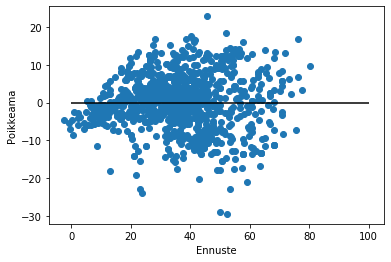

In [9]:
plt.scatter(malli.predict(X), malli.predict(X)-y)

plt.hlines(y=0, xmin=0 ,xmax=100)

plt.xlabel('Ennuste')
plt.ylabel('Poikkeama')

Text(0, 0.5, 'Ennuste')

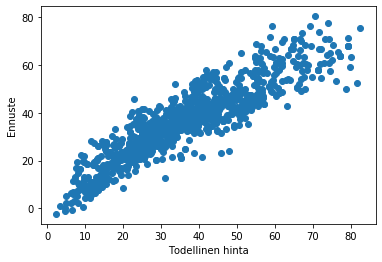

In [10]:
plt.scatter(y, malli.predict(X))

plt.xlabel('Todellinen hinta')
plt.ylabel('Ennuste')

In [11]:
import statsmodels.api as sm
X = sm.add_constant(X)
malli_sm = sm.OLS(y, X).fit()
print(malli_sm.summary())

                                           OLS Regression Results                                           
Dep. Variable:     Concrete compressive strength(MPa, megapascals)    R-squared:                       0.818
Model:                                                          OLS   Adj. R-squared:                  0.817
Method:                                               Least Squares   F-statistic:                     575.5
Date:                                              Fri, 20 Dec 2019   Prob (F-statistic):               0.00
Time:                                                      16:20:42   Log-Likelihood:                -3482.4
No. Observations:                                              1030   AIC:                             6983.
Df Residuals:                                                  1021   BIC:                             7027.
Df Model:                                                         8                                         
Covariance Type:   

C:\Users\mehto\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
